# How to read and manipulate ERA5 data using `xarray`

First load the modules we need. We can give the modules short names if we like, using `import <module_name> as <short_name>`

In [1]:
import xarray as xr # Load xarray and call it xr

In [2]:
import matplotlib.pyplot as plt # We use matplotlib for plotting

Set the path to the ERA5 data

In [3]:
era5_path = "/g/data/rt52/era5/single-levels/"

Note that from here, the files we want can be located different places. (You can also look at this stuff directly in the Gadi terminal too):

In [4]:
!ls /g/data/rt52/era5/single-levels/ # The ! operator means we are carrying out a linux command. This shows us the files within the era5 directory

monthly-averaged  monthly-averaged-by-hour  reanalysis


`reanalysis` means data provided for every hour. `monthly-averaged` means data provided every month.

Eventually, you might want to use hourly data for things like heatwaves.

But for this example, we will use monthly data because it's less data to worry about.

Now we can look at all the variables available:

In [5]:
!ls /g/data/rt52/era5/single-levels/monthly-averaged/

100u   cvl    istl4   mgwd	  msqs	     ptype  str     tsr    vimd
100v   dctb   kx      mgws	  msr	     rhoao  strc    tsrc   viozd
10si   deg0l  lai-hv  mlspf	  msror      ro     strd    ttr    vioze
10u    dl     lai-lv  mlspr	  msshf      rsn    strdc   ttrc   viozn
10v    dndza  lblt    mlssr	  mssror     sd     swh     tvh    vipie
2d     dndzn  lcc     mmtss	  mtdwswrf   sdfor  swh1    tvl    vipile
2t     dwi    lgws    mngwss	  mtnlwrf    sdor   swh2    u10n   vit
alnid  dwps   licd    mntss	  mtnlwrfcs  sf     swh3    ust    vithe
alnip  dwww   lict    mp1	  mtnswrf    shts   swvl1   uvb    vithed
aluvd  e      lmld    mp2	  mtnswrfcs  shww   swvl2   v10n   vithee
aluvp  es     lmlt    mper	  mtpr	     skt    swvl3   viec   vithen
anor   ewss   lsf     mpts	  mvimd      slhf   swvl4   vigd   vitoe
asn    fal    lshf    mpww	  mwd	     slor   tauoc   vige   vitoed
bfi    fdir   lsm     mror	  mwd1	     slt    tcc     vign   vitoee
bld    flsr   lsp     msdrswrf	  mwd2	     smlt

Let's look at temperature: `2t`. The 2 is because it's the temperature at 2 metres.

In [6]:
temperature_path = era5_path + "/monthly-averaged/2t/"
print(temperature_path)

/g/data/rt52/era5/single-levels//monthly-averaged/2t/


For each variable, we have another directory for each year:

In [7]:
!ls /g/data/rt52/era5/single-levels/monthly-averaged/2t/

1959  1964  1969  1974	1979  1984  1989  1994	1999  2004  2009  2014	2019
1960  1965  1970  1975	1980  1985  1990  1995	2000  2005  2010  2015	2020
1961  1966  1971  1976	1981  1986  1991  1996	2001  2006  2011  2016	2021
1962  1967  1972  1977	1982  1987  1992  1997	2002  2007  2012  2017	2022
1963  1968  1973  1978	1983  1988  1993  1998	2003  2008  2013  2018	2023


And for each year, we have a netcdf file for each month:

In [8]:
!ls /g/data/rt52/era5/single-levels/monthly-averaged/2t/2000

2t_era5_moda_sfc_20000101-20000131.nc  2t_era5_moda_sfc_20000701-20000731.nc
2t_era5_moda_sfc_20000201-20000229.nc  2t_era5_moda_sfc_20000801-20000831.nc
2t_era5_moda_sfc_20000301-20000331.nc  2t_era5_moda_sfc_20000901-20000930.nc
2t_era5_moda_sfc_20000401-20000430.nc  2t_era5_moda_sfc_20001001-20001031.nc
2t_era5_moda_sfc_20000501-20000531.nc  2t_era5_moda_sfc_20001101-20001130.nc
2t_era5_moda_sfc_20000601-20000630.nc  2t_era5_moda_sfc_20001201-20001231.nc


### Now lets look at an example file

We do this using `open_dataset`

In [9]:
temperature = xr.open_dataset(temperature_path + "2000/2t_era5_moda_sfc_20000101-20000131.nc")

In [10]:
temperature

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-09 00:08:26 UTC+1000 by era5_replication_tools-1.1....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 single-levels monthly-averaged 2m_temperature 20000101...

Notice there is one Data variable here: `t2m`. Sometimes, a dataset might have more than one variable.

Lets select `t2m`. Once we select it, we end up with a dataArray, not a dataset (it's useful to know which one you have because some commands only work with one of these types)

In [11]:
t_da = temperature['t2m'] # I've called it t_da for short (da for dataArray). You could also write t_da = temperature.t2m if you prefer.

In [12]:
t_da

<xarray.DataArray 't2m' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

The dimensions are important, and `xarray`'s ability to handle multiple dimensions is why its so useful.

Here we have three dimensions: `time`, `latitude` and `longitude`:

In [14]:
t_da.dims # Can also be read from the printout above

('time', 'latitude', 'longitude')

`time` describes the time steps in the dataarray. See that there is only one time (January 2000):

In [15]:
t_da.time

<xarray.DataArray 'time' (time: 1)>
array(['2000-01-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
Attributes:
    long_name:  time

`latitude` is the North-South position (ranging from 90 degrees to -90 degrees North), and `longitude` is the East-West position (-180 degrees to 180 degrees East) of each grid cell.

In [16]:
print(t_da['latitude'])

<xarray.DataArray 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude


In [17]:
print(t_da['longitude'])

<xarray.DataArray 'longitude' (longitude: 1440)>
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes:
    units:      degrees_east
    long_name:  longitude


### Selecting a subset of data.

Lets say you only want to look at one grid cell, in Sydney. The coordinates of Sydney are 34 degrees South (equivalent to -34 degrees North), 151 degrees East.

You select a subset of a dataArray or Dataset using `.sel`:

In [18]:
t_syd = t_da.sel(latitude=-34, longitude=151)

We can see the value of temperature using `.values`. So, the average temperature for the Sydney grid cell in January 2000 was 293 Kelvin, which is 293.72 - 273.15 = 20.56 degrees Celsius.

In [19]:
t_syd.values # in K

array([293.71094], dtype=float32)

In [21]:
t_syd.values - 273.15 # in degrees C

array([20.560944], dtype=float32)

We can look at the whole of Australia by selecting a range of values, using `slice`:

In [22]:
t_aus = t_da.sel(latitude=slice(-10, -45), longitude=slice(110, 155))

Notice we still have one time slice, but now we have a 141x181 grid of values:

In [25]:
t_aus

<xarray.DataArray 't2m' (time: 1, latitude: 141, longitude: 181)>
[25521 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 110.0 110.2 110.5 110.8 ... 154.5 154.8 155.0
  * latitude   (latitude) float32 -10.0 -10.25 -10.5 ... -44.5 -44.75 -45.0
  * time       (time) datetime64[ns] 2000-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

### Plotting

Plotting is really easy with `xarray`. If your array is 1d (like a time series for a single grid cell), or 2d (like a map of a single time slice), you can plot using `.plot`

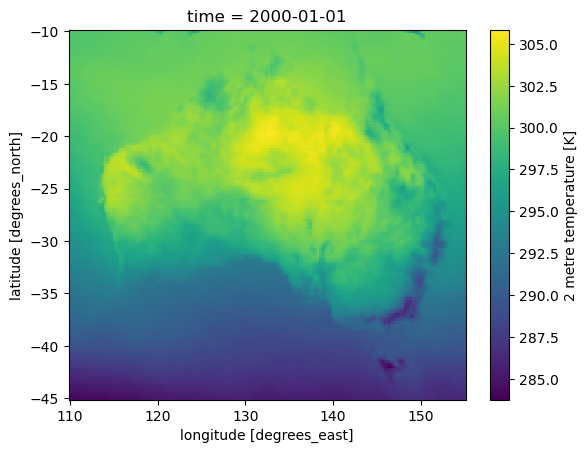

In [26]:
t_aus.plot() # Average temperature during January 2000 over Australia.